In [1]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [2]:
import numpy as np
import pandas as pd

In [3]:
TF = 'MITF'

df = pd.read_csv(f'datasets/{TF}/dataset_{TF}_encoded.csv')

In [4]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[['A', 'D', 'D', 'A'], ['M', 'A', 'D', 'A'], [...","[['A', 'n', 'n', 'A'], ['x', 'A', 'n', 'A'], [..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['A', 'D', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['A', 'n', 'n', 'A'], [..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[['A', 'A', 'D', 'n'], ['M', 'A', 'D', 'A'], [...","[['A', 'D', 'A', 'x'], ['x', 'A', 'n', 'A'], [..."


In [5]:
from src.utils import categorize_change

df["Category"] = df["Change"].apply(categorize_change)

In [6]:
from ast import literal_eval
from src.encode import one_hot_encode_grooves


def parse_literal(value):
    return value if isinstance(value, list) else literal_eval(value)

df["Groove_major"] = df["Groove_major"].map(parse_literal)
df["Groove_minor"] = df["Groove_minor"].map(parse_literal)
df["Groove_major_OH"], df["Groove_minor_OH"] = zip(
    *df.apply(lambda r: one_hot_encode_grooves(r["Groove_major"], r["Groove_minor"]), axis=1)
)

In [7]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH
0,AA,1,-0.312518,ATATCACGTGATAC,GTATCACGTGATAA,"[[A, D, D, A], [M, A, D, A], [A, D, A, M], [M,...","[[A, n, n, A], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0..."
1,AA,2,-0.021256,GAATCACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [A, D, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [A, n, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
2,AA,3,-0.528420,GTATCACGTGATAC,GTATCACGTGAAAC,"[[A, A, D, n], [M, A, D, A], [A, D, D, A], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, n, A], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
3,AA,4,-1.084303,GTAACACGTGATAC,GTATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [A,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
4,AA,5,-2.494835,GTATAACGTGATAC,GTATCACGTAATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
...,...,...,...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0..."


In [8]:
# Create X_train by concatenating Groove_major_OH and Groove_minor_OH along axis=1
X = np.stack([
    np.concatenate([np.asarray(mj, dtype=np.int8), np.asarray(mn, dtype=np.int8)], axis=1)
    for mj, mn in zip(df["Groove_major_OH"], df["Groove_minor_OH"])
], axis=0).astype(np.float32)

df["encoded_sequence"] = list(X)

In [9]:
df.iloc[0]["encoded_sequence"].shape

(14, 8, 4)

In [10]:
# Train on samples with Category == 'none', test on the rest
df_train = df[df["Category"] == "mismatch"].copy()
df_test = df[df["Category"] != "mismatch"].copy()


In [11]:
# Create training and testing datasets
X_train = np.stack(df_train["encoded_sequence"].to_numpy(), axis=0)
y_train = df_train["ln(I)"].to_numpy()

X_test = np.stack(df_test["encoded_sequence"].to_numpy(), axis=0)
y_test = df_test["ln(I)"].to_numpy()

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((194, 14, 8, 4), (194,), (1068, 14, 8, 4), (1068,))

In [13]:
# Flatten encoded groove tensors for linear model
n_samples, seq_length, n_features, n_encoding = X_train.shape
X_train = X_train.reshape((n_samples, seq_length * n_features * n_encoding))

X_test = X_test.reshape((X_test.shape[0], seq_length * n_features * n_encoding))

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
linear_reg = LinearRegression()
linear_reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
score = linear_reg.score(X_train, y_train)
score

0.9044313561327808

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
kf_cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=kfold)
kf_cv_scores.mean()

np.float64(0.7026982066155684)

In [19]:
ypred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)

mae, mse

(0.32931992263275367, 0.20156687154693106)

In [20]:
df_test['y_pred'] = ypred

In [21]:
df_test

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH,encoded_sequence,y_pred
24,AD,1,-0.199263,ATATCACGTGATAC,GTATCACGTGATAD,"[[A, D, x, x], [M, A, D, A], [A, D, A, M], [M,...","[[A, n, x, x], [x, A, n, A], [A, n, A, x], [x,...",D,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 0], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.251719
25,AD,2,-0.386851,GAATCACGTGATAC,GTATCACGTGATDC,"[[A, A, D, n], [A, D, x, x], [A, D, A, M], [M,...","[[A, D, A, x], [A, n, x, x], [A, n, A, x], [x,...",D,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.004638
26,AD,3,-0.272029,GTATCACGTGATAC,GTATCACGTGADAC,"[[A, A, D, n], [M, A, D, A], [A, D, x, x], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, x, x], [x,...",D,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.388940
27,AD,4,-1.225539,GTAACACGTGATAC,GTATCACGTGDTAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [A,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [A,...",D,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-1.046867
28,AD,5,-1.958986,GTATAACGTGATAC,GTATCACGTDATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",D,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-2.119456
...,...,...,...,...,...,...,...,...,...,...,...,...
1257,gg,10,-1.605242,GTATCACGTgATAC,GTATgACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.824253
1258,gg,11,-1.391758,GTATCACGTGgTAC,GTAgCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.518966
1259,gg,12,-0.879398,GTATCACGTGAgAC,GTgTCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.283311
1260,gg,13,-0.252286,GTATCACGTGATgC,GgATCACGTGATAC,"[[A, A, D, n], [M, A, D, A], [A, D, A, M], [M,...","[[A, D, A, x], [x, A, n, A], [A, n, A, x], [x,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [1...","[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], ...",-0.259730


In [22]:
from sklearn.metrics import r2_score

y_pred = df_test['y_pred']
r2 = r2_score(y_test, y_pred)
r2

0.6870222708282133

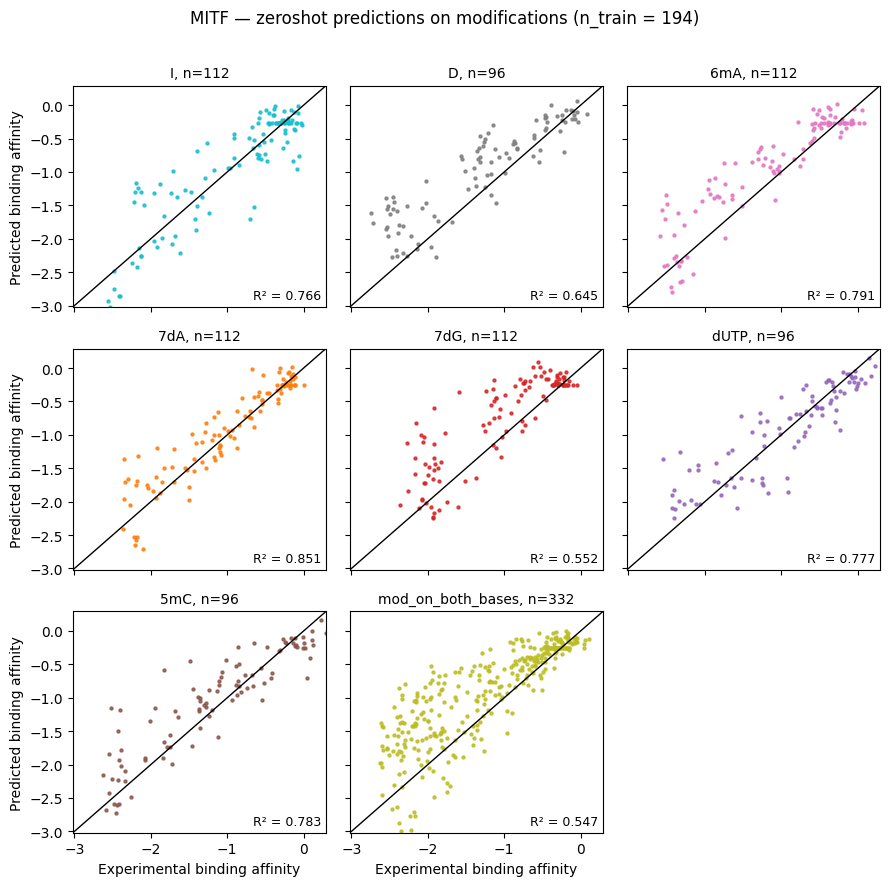

In [23]:
# 3x3 grid of per-category scatter plots with R² annotated
from matplotlib import pyplot as plt

from src.constants import COLOR_MODS

# Use existing color mapping if available; otherwise create a simple one
cats_present = sorted(df_test["Category"].unique().tolist())

order = [c for c in COLOR_MODS.keys() if c in cats_present]
order.extend([c for c in cats_present if c not in order])
colors = {cat: COLOR_MODS.get(cat, None) for cat in order}

# Global axis limits for comparability
p1 = max(df_test["y_pred"].max(), df_test["ln(I)"].max())
p2 = min(df_test["y_pred"].min(), df_test["ln(I)"].min())

fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.ravel()

for i, cat in enumerate(order[:9]):
    ax = axes[i]
    g = df_test[df_test["Category"] == cat]

    ax.scatter(g["ln(I)"], g["y_pred"], s=18, marker='.', alpha=0.85, c=colors.get(cat, None))
    ax.plot([p2, p1], [p2, p1], 'k-', linewidth=1)
    ax.set_xlim([p2, p1])
    ax.set_ylim([p2, p1])

    # Compute R² safely
    try:
        r2_cat = r2_score(g["ln(I)"], g["y_pred"]) if len(g) >= 2 else float("nan")
    except Exception:
        r2_cat = float("nan")

    ax.set_title(f"{cat}, n={len(g)}", fontsize=10)
    ax.text(0.98, 0.02, f"R² = {r2_cat:.3f}" if r2_cat == r2_cat else "R² = N/A",
            transform=ax.transAxes, ha="right", va="bottom",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7), fontsize=9)

# Hide unused subplots if fewer than 9 categories
for j in range(len(order), 9):
    axes[j].axis("off")

# Label only outer axes
for ax in axes[6:9]:
    ax.set_xlabel("Experimental binding affinity")
for ax in axes[::3]:
    ax.set_ylabel("Predicted binding affinity")

fig.suptitle(f"{TF} — zeroshot predictions on modifications (n_train = {len(df_train)})", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save pdf
plt.savefig(f"plots/{TF}_linear_zeroshot_modifications.pdf")


In [ ]:
# Trivial predictions

In [ ]:
from src.encode import groove_encoding_for_strands
from src.constants import TRIVIAL_PREDICTION_MAP

# Zero-shot vs trivial substitution predictions (exclude 'mod_on_both_bases')
mods = [c for c in order if c != 'mod_on_both_bases']
df_mods = df_test[df_test["Category"].isin(mods)].copy()



# Build trivial-substitution encoded tensors (replace modified nucleotides everywhere)
def trivialize_strand(strand_tokens):
    return [
        [TRIVIAL_PREDICTION_MAP.get(tok, tok) for tok in base_tokens]
        for base_tokens in strand_tokens
    ]


trivial_encoded = []
for _, row in df_mods.iterrows():
    # Copy strands
    plus_strand = [list(n) for n in row["Plus_strand"]]
    minus_strand = [list(n) for n in row["Minus_strand"]]

    # Substitute any modified nucleotides by their trivial counterparts
    plus_trivial = trivialize_strand(plus_strand)
    minus_trivial = trivialize_strand(minus_strand)

    plus_trivial_str = "".join(b[0] for b in plus_trivial)
    minus_trivial_str = "".join(b[0] for b in minus_trivial)

    # Compute the grooves again
    gm, gn = groove_encoding_for_strands(plus_trivial_str, minus_trivial_str)


    gm_oh, gn_oh = one_hot_encode_grooves(gm, gn)
    enc = np.concatenate(
        [np.asarray(gm_oh, dtype=np.int8), np.asarray(gn_oh, dtype=np.int8)],
        axis=1
    ).astype(np.float32)
    trivial_encoded.append(enc)

X_trivial = np.stack(trivial_encoded, axis=0)
X_trivial_flat = X_trivial.reshape((X_trivial.shape[0], seq_length * n_features * n_encoding))
y_trivial_pred = linear_reg.predict(X_trivial_flat)

# Store
df_mods["y_trivial"] = y_trivial_pred.astype(np.float32)
df_test.loc[df_mods.index, "y_trivial"] = df_mods["y_trivial"]


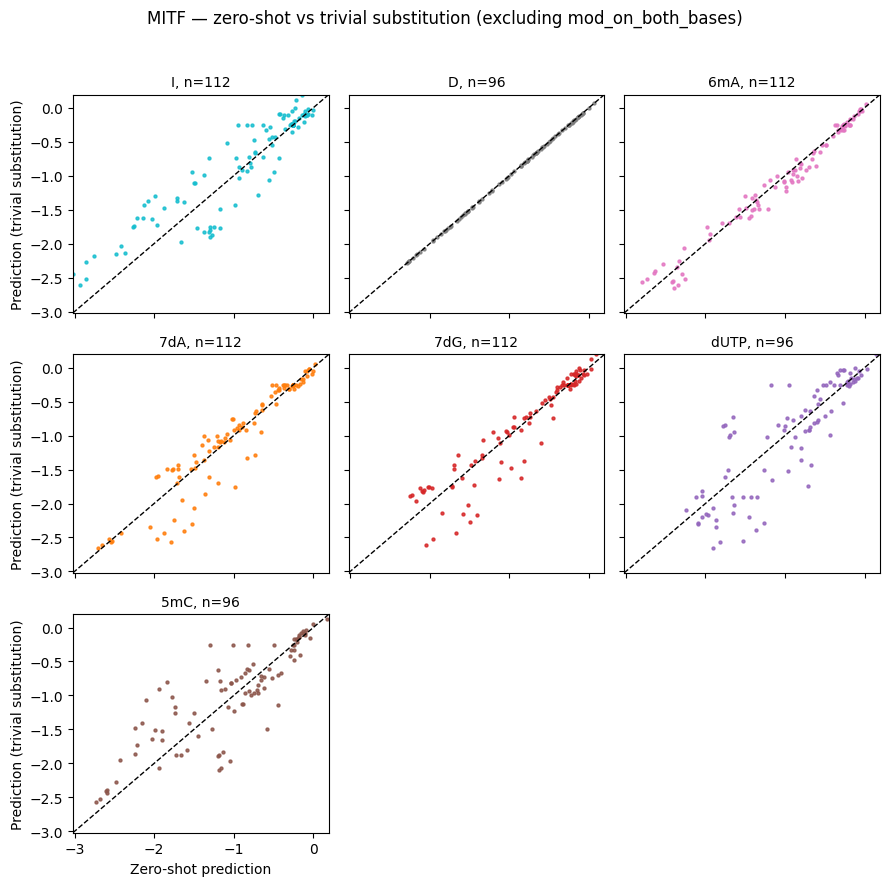

In [31]:
# Plot per modification
n_plots = len(mods)
rows, cols = 3, 3
fig2, axes2 = plt.subplots(rows, cols, figsize=(9, 9), sharex=True, sharey=True)
axes_flat = axes2.ravel()

xmin = df_mods["y_pred"].min()
xmax = df_mods["y_pred"].max()
ymin = df_mods["y_trivial"].min()
ymax = df_mods["y_trivial"].max()
pmin = min(xmin, ymin)
pmax = max(xmax, ymax)

for i, cat in enumerate(mods):
    ax = axes_flat[i]
    g = df_mods[df_mods["Category"] == cat]
    ax.scatter(g["y_pred"], g["y_trivial"], s=18, marker='.', alpha=0.85, c=COLOR_MODS.get(cat))
    ax.plot([pmin, pmax], [pmin, pmax], 'k--', linewidth=1)
    ax.set_title(f"{cat}, n={len(g)}", fontsize=10)
    ax.set_xlim(pmin, pmax)
    ax.set_ylim(pmin, pmax)

# Hide unused axes
for j in range(n_plots, rows * cols):
    axes_flat[j].axis("off")

# Labels
for ax in axes_flat[cols*(rows-1):]:
    ax.set_xlabel("Zero-shot prediction")
for ax in axes_flat[::cols]:
    ax.set_ylabel("Prediction (trivial substitution)")

fig2.suptitle(f"{TF} — zero-shot vs trivial substitution (excluding mod_on_both_bases)", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

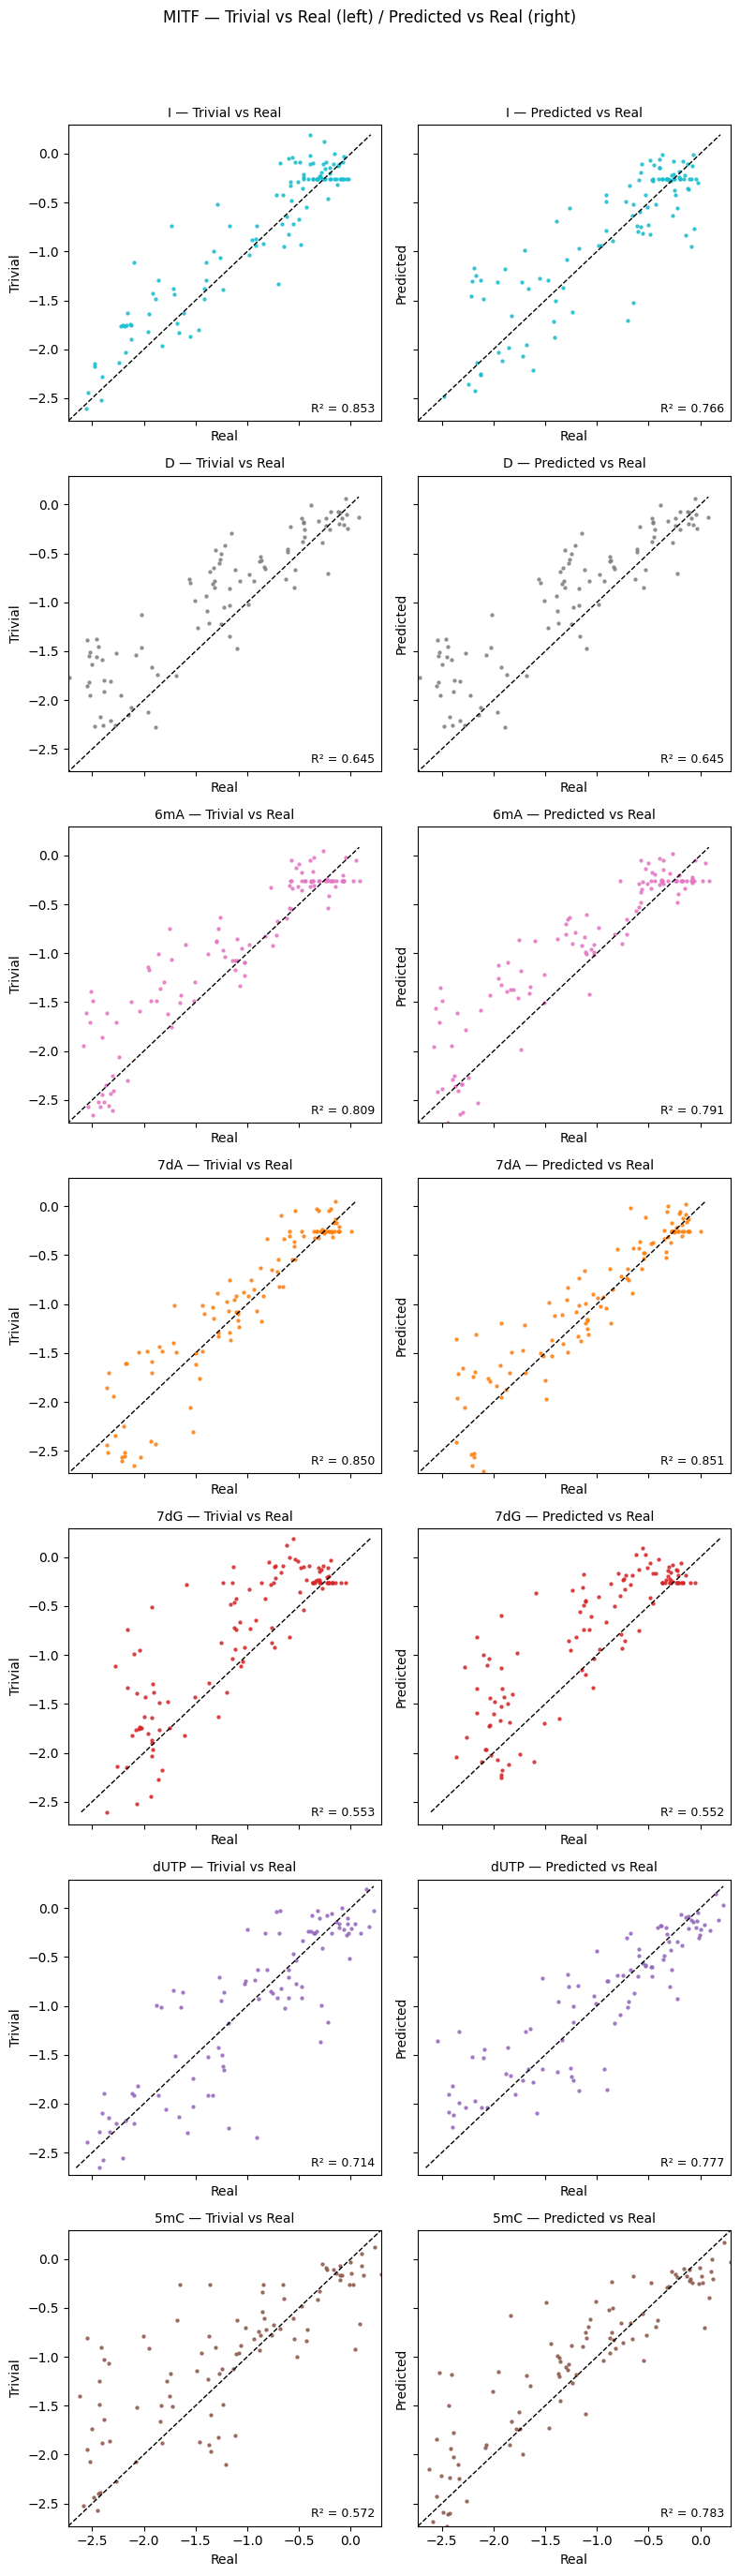

In [34]:
# Create figure with 2 columns: (1) trivial vs real, (2) predicted vs real
n_plots = len(mods)
rows = n_plots
cols = 2

fig2, axes2 = plt.subplots(rows, cols, figsize=(8, 4 * n_plots), sharex=True, sharey=True)

# Handle single-row case
if n_plots == 1:
    axes2 = np.array([axes2])

for i, cat in enumerate(mods):
    g = df_mods[df_mods["Category"] == cat]

    # Determine limits
    ymin = min(g["ln(I)"].min(), g["y_trivial"].min(), g["y_pred"].min())
    ymax = max(g["ln(I)"].max(), g["y_trivial"].max(), g["y_pred"].max())

    # Left plot: trivial vs real
    ax1 = axes2[i, 0]
    ax1.scatter(g["ln(I)"], g["y_trivial"], s=18, alpha=0.8, marker='.', c=COLOR_MODS.get(cat))
    ax1.plot([ymin, ymax], [ymin, ymax], 'k--', linewidth=1)
    ax1.set_title(f"{cat} — Trivial vs Real", fontsize=10)
    ax1.set_xlabel("Real")
    ax1.set_ylabel("Trivial")
    ax1.set_xlim(ymin, ymax)
    ax1.set_ylim(ymin, ymax)
    # R² annotation (bottom-right)
    try:
        r2_triv = r2_score(g["ln(I)"], g["y_trivial"]) if len(g) >= 2 else float("nan")
    except Exception:
        r2_triv = float("nan")
    ax1.text(
        0.98, 0.02,
        f"R² = {r2_triv:.3f}" if r2_triv == r2_triv else "R² = N/A",
        transform=ax1.transAxes, ha="right", va="bottom",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7),
        fontsize=9
    )

    # Right plot: predicted vs real
    ax2 = axes2[i, 1]
    ax2.scatter(g["ln(I)"], g["y_pred"], s=18, alpha=0.8, marker='.', c=COLOR_MODS.get(cat))
    ax2.plot([ymin, ymax], [ymin, ymax], 'k--', linewidth=1)
    ax2.set_title(f"{cat} — Predicted vs Real", fontsize=10)
    ax2.set_xlabel("Real")
    ax2.set_ylabel("Predicted")
    ax2.set_xlim(ymin, ymax)
    ax2.set_ylim(ymin, ymax)
    # R² annotation (bottom-right)
    try:
        r2_pred = r2_score(g["ln(I)"], g["y_pred"]) if len(g) >= 2 else float("nan")
    except Exception:
        r2_pred = float("nan")
    ax2.text(
        0.98, 0.02,
        f"R² = {r2_pred:.3f}" if r2_pred == r2_pred else "R² = N/A",
        transform=ax2.transAxes, ha="right", va="bottom",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7),
        fontsize=9
    )

fig2.suptitle(f"{TF} — Trivial vs Real (left) / Predicted vs Real (right)", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
